<a href="https://colab.research.google.com/github/gnapat/CNN_Imageclassified/blob/allone/hw01_allone_thaifood10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print( f"Matplotlib {matplotlib.__version__}\n" )

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNet

import cv2 as cv
import pandas as pd

Python 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]

NumPy 1.23.5

Matplotlib 3.7.2



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow 2.12.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 2 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU
.... GPU No. 1: Name = /physical_device:GPU:1 , Type = GPU


Dataset preparing

In [ ]:
!ls -lrt /kaggle/input/top-10-best-rated-thai-food/top10_thai_food_dataset/


total 0
drwxr-xr-x 12 nobody nogroup 0 Oct 30 17:15 test
drwxr-xr-x 12 nobody nogroup 0 Oct 30 17:15 train
drwxr-xr-x 12 nobody nogroup 0 Oct 30 17:15 val


In [ ]:
def to_array(X):
  images=[]
  for x in X:
    img_array = tf.keras.preprocessing.image.img_to_array(x).astype(np.uint8)
    images.append(img_array)

  X_ret = np.array(images)

  return X_ret




def do_augmentation(img,y,aug):

  ret_x=[]
  ret_y=[]

  if aug == 1:
    aug_list = [Image.FLIP_LEFT_RIGHT]
  elif aug == 2:
    aug_list = [Image.ROTATE_180]
  elif aug == 3:
    #aug_list = [Image.ROTATE_90,Image.ROTATE_180,Image.ROTATE_270]
    aug_list = [Image.ROTATE_90,Image.ROTATE_90,Image.ROTATE_90]
  elif aug == 4:
    #aug_list = [Image.ROTATE_90,Image.ROTATE_180,Image.ROTATE_270,Image.FLIP_LEFT_RIGHT,Image.ROTATE_90,Image.ROTATE_180,Image.ROTATE_270]
    aug_list = [Image.ROTATE_90,Image.ROTATE_90,Image.ROTATE_90,Image.FLIP_LEFT_RIGHT,Image.ROTATE_90,Image.ROTATE_90,Image.ROTATE_90]



  ret_x.append(img)
  ret_y.append(y)

  #img = tf.keras.utils.array_to_img(img)

  for iaug in aug_list:
    img = img.transpose(method=iaug)
    #img_arr = tf.keras.preprocessing.image.img_to_array(img)
    ret_x.append(img)
    ret_y.append(y)



  return ret_x,ret_y

def load_dataset(xlist,ylist,aug=0):

  images = []
  labels = []

  cc = 0
  for f in xlist:
    img = tf.keras.preprocessing.image.load_img(f, target_size=(224, 224))

    if aug != 0:
      # do aug
      img_aug , y_aug = do_augmentation(img=img,y=ylist[cc],aug=aug)

      images.extend(img_aug)
      labels.extend(y_aug)
      #pass

    else:
      #img = tf.keras.preprocessing.image.img_to_array(img)
      img = tf.keras.preprocessing.image.img_to_array(img)
      images.append(img)
      labels.append(ylist[cc])

    cc += 1

  return images,labels




def prepare_dataset(path,lables,test_size=0.2, random_state=42,split=True,augmentation=0,do_img_array=0):

  x = []
  y=[]
  x_path=[]
  images = []
  X_train = np.empty((244,244,3))
  X_test = np.array([])
  y_train = np.empty( (244,244,3))
  y_test =np.array([])

  for i in rock_label:
    folder_path=f"{path}/{rock_label[i]}"
    print(folder_path)
    files = os.listdir(folder_path)
    for file in files:
      target_path = f"{folder_path}/{file}"
      #print(target_path)
      #img =  tf.keras.preprocessing.image.load_img(target_path, target_size=(224, 224))
      #img = tf.keras.preprocessing.image.img_to_array(img)
      #images.append(img)

      x_path.append(target_path)
      y.append(int(i))

  if split == True:
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(x_path, y, test_size=0.3, random_state=42)
    #print(type(X_train_temp))
    X_train_temp, y_train_temp = load_dataset(X_train_temp,y_train_temp,augmentation)
    #print(type(X_train_temp))
    X_test_temp, y_test_temp = load_dataset(X_test_temp,y_test_temp,augmentation)

  if split == True:
    if do_img_array == 0:
      # return with image format
      return X_train_temp, X_test_temp, y_train_temp, y_test_temp
    else:
      # return with nunpy array
      X_train_temp = to_array(X_train_temp)
      X_test_temp = to_array(X_test_temp)
      y_train_temp = np.array(y_train_temp)
      y_test_temp = np.array(y_test_temp)

      return X_train_temp, X_test_temp, y_train_temp, y_test_temp
  else:
    return X,Y

def get_label_from_dataset(path):
  label_dict={}
  files = os.listdir(f"{path}/train")
  cc = 0
  for file in files:
        print(file)
        key=f"{cc}"
        label_dict[cc] = file
        cc += 1
  #print(label_dict)
  return(label_dict)


def prepare_dataset_top10(path,lables,test_size=0.2, random_state=42,split=True,augmentation=0,do_img_array=0):

  x = []
  y=[]
  x_path=[]
  images = []
  X_train = np.empty((244,244,3))
  X_test = np.array([])
  y_train = np.empty( (244,244,3))
  y_test =np.array([])

  for j in ['train','test']:

    for i in lables:
      folder_path=f"{path}/{j}/{lables[i]}"
      print(folder_path)
      files = os.listdir(folder_path)
      for file in files:
        target_path = f"{folder_path}/{file}"
        #print(target_path)
        #img =  tf.keras.preprocessing.image.load_img(target_path, target_size=(224, 224))
        #img = tf.keras.preprocessing.image.img_to_array(img)
        #images.append(img)

        x_path.append(target_path)
        y.append(int(i))

  if split == True:
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(x_path, y, test_size=0.3, random_state=42)
    #print(type(X_train_temp))
    X_train_temp, y_train_temp = load_dataset(X_train_temp,y_train_temp,augmentation)
    #print(type(X_train_temp))
    X_test_temp, y_test_temp = load_dataset(X_test_temp,y_test_temp,augmentation)

  if split == True:
    if do_img_array == 0:
      # return with image format
      return X_train_temp, X_test_temp, y_train_temp, y_test_temp
    else:
      # return with nunpy array
      X_train_temp = to_array(X_train_temp)
      X_test_temp = to_array(X_test_temp)
      y_train_temp = np.array(y_train_temp)
      y_test_temp = np.array(y_test_temp)

      return X_train_temp, X_test_temp, y_train_temp, y_test_temp
  else:
    return X,Y


In [ ]:
path="/kaggle/input/top-10-best-rated-thai-food/top10_thai_food_dataset/"
rock_label={"0":"Joke","1":"KaiThoon","2":"KaiJeowMooSaap","3":"KaoManGai"}
#print(type(rock_label))
Glabel = get_label_from_dataset(path)
print(Glabel)
X_train,X_test,Y_train,Y_test = prepare_dataset_top10(path=path,lables=Glabel,split=True,augmentation=3,do_img_array=1)


Tom_kha_gai
Phat_kaphrao
Khao_phat
Massaman_Curry
Phanaeng_Curry
Green_Curry
Khao_soi
Roti_canai
Tom_yum
Pad_Thai
{0: 'Tom_kha_gai', 1: 'Phat_kaphrao', 2: 'Khao_phat', 3: 'Massaman_Curry', 4: 'Phanaeng_Curry', 5: 'Green_Curry', 6: 'Khao_soi', 7: 'Roti_canai', 8: 'Tom_yum', 9: 'Pad_Thai'}
/kaggle/input/top-10-best-rated-thai-food/top10_thai_food_dataset//train/Tom_kha_gai
/kaggle/input/top-10-best-rated-thai-food/top10_thai_food_dataset//train/Phat_kaphrao
/kaggle/input/top-10-best-rated-thai-food/top10_thai_food_dataset//train/Khao_phat
/kaggle/input/top-10-best-rated-thai-food/top10_thai_food_dataset//train/Massaman_Curry
/kaggle/input/top-10-best-rated-thai-food/top10_thai_food_dataset//train/Phanaeng_Curry
/kaggle/input/top-10-best-rated-thai-food/top10_thai_food_dataset//train/Green_Curry
/kaggle/input/top-10-best-rated-thai-food/top10_thai_food_dataset//train/Khao_soi
/kaggle/input/top-10-best-rated-thai-food/top10_thai_food_dataset//train/Roti_canai
/kaggle/input/top-10-best-rate

In [ ]:
Glabel[0]

'Tom_kha_gai'

In [ ]:
base_architecture = {"VGG16": VGG16(weights="imagenet", include_top=True),
                     "ResNet50":ResNet50(weights='imagenet', include_top=True),
                     "MobileNet":MobileNet(weights='imagenet', include_top=True)}

processing= {"VGG16": tf.keras.applications.vgg16,
                     "ResNet50":tf.keras.applications.resnet50,
                     "MobileNet":tf.keras.applications.mobilenet_v3}

base_architecture_list = ["VGG16","ResNet50","MobileNet"]


In [ ]:
def do_predic(aname,x):

  model = base_architecture[aname]
  x_train_preprocess = processing[aname].preprocess_input(x)
  img_preprocess1 = np.expand_dims(x_train_preprocess,axis=0)
  pred = model.predict(img_preprocess1)

  return(pred)

def imagenet_decode_predictions( preds, top=5 ):
    """
    This function is adapted from https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
    Our adaptation is done so that ImageNet's class indices (0-999) are included in the function's outputs.

    Arguments:
        preds (numpy array): a batch of ImageNet's prediction outputs
        top (int): only decode 'top' classes with maximum scores

    Return a tuple of:
        Output[0]: a dict of { class_index:class_name } regarding the whole ImageNet dataset
        Output[1]: a 4D tuple of (class_index, class_name, class_description, score)
            Note that 'score' can be prediction values with or without the softmax activation, depending on the input 'preds'
    """
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                                 'a batch of predictions '
                                 '(i.e. a 2D array of shape (samples, 1000)). '
                                 'Found array with shape: ' + str(preds.shape))

    import json

    CLASS_INDEX_PATH = ('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
    fpath = tf.keras.utils.get_file( 'imagenet_class_index.json',
                                                CLASS_INDEX_PATH,
                                                cache_subdir='models',
                                                file_hash='c2c37ea517e94d9795004a39431a14cb' )
    with open(fpath) as f:
        CLASS_INDEX = json.load(f)
        CLASS_INDEX = dict( zip( [ int(i) for i in CLASS_INDEX.keys() ], CLASS_INDEX.values() ) )

    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [ (i,) + tuple(CLASS_INDEX[i]) + (pred[i],) for i in top_indices ]
        result.sort(key=lambda x: x[-1], reverse=True)
        results.append(result)

    return CLASS_INDEX, results

In [ ]:

def show_prediction_by_pic(input):
  list_pred=[]
  list_result=[]
  M = len(base_architecture_list)
  print(M)
  fig, ax = plt.subplots(1, M+1, figsize=(30, 5))

  ax[0].imshow(tf.keras.preprocessing.image.array_to_img(input))
  ax[0].set_title('Plot')
  c=1
  for m in base_architecture_list:
    print(m)
    model = base_architecture[m]
    x_preprocess = processing[m].preprocess_input(input)
    #x_test_preprocess = processing[m].preprocess_input(X_test)

    img_preprocess1 = np.expand_dims(x_preprocess,axis=0)
    pred = model.predict(img_preprocess1)
    list_pred.append(pred)
    imagenet_dict, result1  = imagenet_decode_predictions(pred)
    list_result.append(result1)

    df = pd.DataFrame(result1[0], columns=['Index', 'ID', 'Description', 'Score'])
    title=f"model {base_architecture_list[c-1]}"
    ax[c].set_title(title)
    table = ax[c].table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')
    table.scale(1, 4)
    c += 1
  plt.show()



3
VGG16
35363/35363 [==============================] - 0s 0us/step
ResNet50
1/1 [==============================] - 2s 2s/step
MobileNet
1/1 [==============================] - 1s 700ms/step


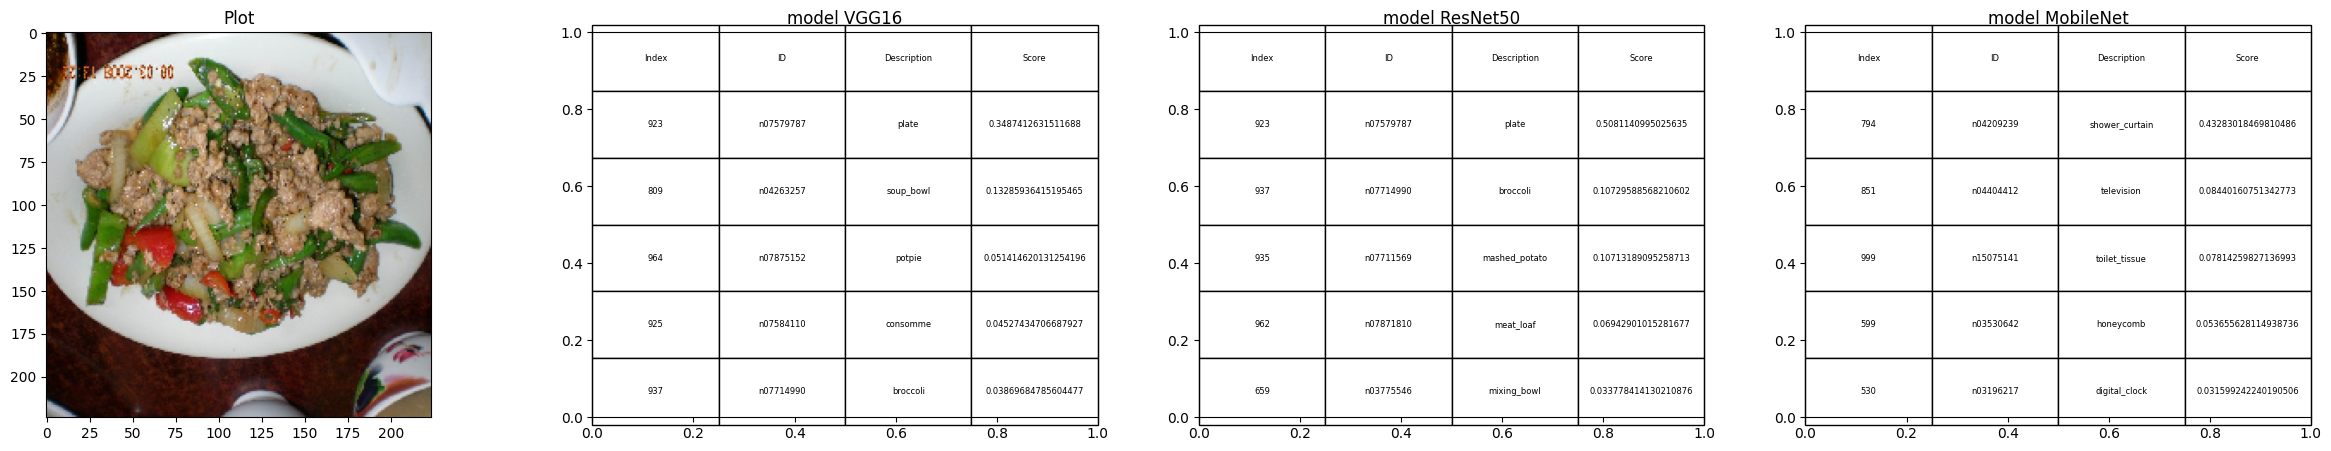

In [ ]:
import pandas as pd
show_prediction_by_pic(X_train[2])

In [ ]:
img_w,img_h = 224,224
my_architecture = {"VGG16": VGG16(weights = "imagenet", include_top=False, input_shape = (img_w, img_h, 3)),
                     "ResNet50":ResNet50(weights = "imagenet", include_top=False, input_shape = (img_w, img_h, 3)),
                     "MobileNet":MobileNet(weights = "imagenet", include_top=False, input_shape = (img_w, img_h, 3))}
my_model=[]
for m in base_architecture_list:
  my_architecture[m].trainable = False

  x = my_architecture[m].output
  # Add our custom layer(s) to the end of the existing model
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(512, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  new_outputs = tf.keras.layers.Dense(4, activation="softmax")(x)

  # Construct the main model
  model = tf.keras.models.Model(inputs=my_architecture[m].inputs, outputs=new_outputs)
  model.compile( loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"] )

  my_model.append(model)




17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
#my_model[0].summary()

In [ ]:
all_history=[]
cc = 0
for m in base_architecture_list:
  x_train_ = processing[m].preprocess_input(X_train)
  x_test_ = processing[m].preprocess_input(X_test)
  history = my_model[cc].fit( x_train_, Y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2 )
  cc += 1

  all_history.append(history)

Epoch 1/20
40/40 [==============================] - 66s 1s/step - loss: nan - acc: 0.1104 - val_loss: nan - val_acc: 0.0947
Epoch 2/20
40/40 [==============================] - 26s 646ms/step - loss: nan - acc: 0.1098 - val_loss: nan - val_acc: 0.0947
Epoch 3/20
40/40 [==============================] - 26s 656ms/step - loss: nan - acc: 0.1098 - val_loss: nan - val_acc: 0.0947
Epoch 4/20
40/40 [==============================] - 28s 696ms/step - loss: nan - acc: 0.1098 - val_loss: nan - val_acc: 0.0947
Epoch 9/20
40/40 [==============================] - 28s 696ms/step - loss: nan - acc: 0.1098 - val_loss: nan - val_acc: 0.0947
Epoch 10/20
40/40 [==============================] - 28s 695ms/step - loss: nan - acc: 0.1098 - val_loss: nan - val_acc: 0.0947
Epoch 11/20
40/40 [==============================] - 28s 697ms/step - loss: nan - acc: 0.1098 - val_loss: nan - val_acc: 0.0947
Epoch 12/20
40/40 [==============================] - 28s 698ms/step - loss: nan - acc: 0.1098 - val_loss: nan - 

In [ ]:
cc = 0
for m in base_architecture_list:
  x_train_ = processing[m].preprocess_input(X_train)
  x_test_ = processing[m].preprocess_input(X_test)
  history = my_model[cc].evaluate(x_test_, Y_test, batch_size=128)
  cc += 1

In [ ]:
all_history[0]

plt.figure(figsize=(15,5))
#plt.plot(all_history[0].history['acc'])
plt.plot(all_history[0].history['val_acc'])
plt.plot(all_history[1].history['val_acc'])
plt.plot(all_history[2].history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend([base_architecture_list[0], base_architecture_list[1], base_architecture_list[2]], loc='lower right')
plt.grid()
plt.show()

In [ ]:
from datetime import datetime
cc=0
for m in base_architecture_list:

  current_datetime = datetime.now()
  datetime_string = current_datetime.strftime('%Y%m%d_%H%M%S')
  fn = f"{m}_{datetime_string}.h5"
  my_model[cc].save(fn)
  cc += 1

In [ ]:
!echo $datetime_string
!mkdir drive/MyDrive/Gz/nida/dl/hw01/$datetime_string
!cp *.h5 drive/MyDrive/Gz/nida/dl/hw01/$datetime_string/

In [ ]:
def mo_imagenet_decode_predictions( preds, top=5 ):
    """
    This function is adapted from https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
    Our adaptation is done so that ImageNet's class indices (0-999) are included in the function's outputs.

    Arguments:
        preds (numpy array): a batch of ImageNet's prediction outputs
        top (int): only decode 'top' classes with maximum scores

    Return a tuple of:
        Output[0]: a dict of { class_index:class_name } regarding the whole ImageNet dataset
        Output[1]: a 4D tuple of (class_index, class_name, class_description, score)
            Note that 'score' can be prediction values with or without the softmax activation, depending on the input 'preds'
    """
    if len(preds.shape) != 2 or preds.shape[1] != 4:
        raise ValueError('`decode_predictions` expects '
                                 'a batch of predictions '
                                 '(i.e. a 2D array of shape (samples, 1000)). '
                                 'Found array with shape: ' + str(preds.shape))

    import json

    CLASS_INDEX_PATH = ('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
    fpath = tf.keras.utils.get_file( 'imagenet_class_index.json',
                                                CLASS_INDEX_PATH,
                                                cache_subdir='models',
                                                file_hash='c2c37ea517e94d9795004a39431a14cb' )
    with open(fpath) as f:
        CLASS_INDEX = json.load(f)
        CLASS_INDEX = dict( zip( [ int(i) for i in CLASS_INDEX.keys() ], CLASS_INDEX.values() ) )

    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        #top_indices


        #result = [ (i,) + tuple(CLASS_INDEX[i]) + (pred[i],) for i in top_indices ]
        for i in top_indices:
          if i < len(rock_label):
            #print(l)
            #print(CLASS_INDEX[i])
            result =  [(i,) + tuple([rock_label[str(i)]]) + (pred[i],)]
            result.sort(key=lambda x: x[-1], reverse=True)
            results.append(result)

    return CLASS_INDEX, results

In [ ]:
plt.imshow(tf.keras.preprocessing.image.array_to_img(X_test[599])); plt.show()
img_preprocess1 = np.expand_dims(x_test_[599],axis=0)
pred = model.predict(img_preprocess1)
his,result = mo_imagenet_decode_predictions(pred)
result

In [ ]:
img_preprocess1 = np.expand_dims(x_test_[498],axis=0)
pred = model.predict(img_preprocess1)

In [ ]:
his,result = mo_imagenet_decode_predictions(pred)
result